<a href="https://colab.research.google.com/github/sanjaymkr/NYC-Taxi-Trip-Time-Prediction/blob/main/Sanjay_Kumar_NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = ('/content/drive/MyDrive/Alma_Data/NYC Taxi Data.csv')

# Import Libraries

In [5]:
!pip install klib

     |████████████████████████████████| 132 kB 5.4 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [6]:
import klib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

#Load the Data

In [8]:
ndf = pd.read_csv(path)

# Data Exploration

In [9]:
#Check shape of dataset
ndf.shape

(1458644, 11)

There are 1458644 observations and 11 available features.

In [10]:
# Looking at first five observations
ndf.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
# Looking at last five observations
ndf.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [12]:
# checking data-types of variables to identify the numerical and categorical variables
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [13]:
# Counting the number of features belonging to each dataset
ndf.dtypes.value_counts()

object     4
float64    4
int64      3
dtype: int64

# Categorizing the features :
Dividing the features into categories:

**Geographical:** pickup_longitude , pickup_latitude , dropoff_longitude , dropoff_latitude

**Time related:** pickup_datetime, dropoff_datetime

**Identifier:** id(not useful for analysis)

**Others:** vendor_id, passenger_count, store_and_fwd_flag

**Target:** trip_duration

In [14]:
# Looking at the statistical values of object type features
ndf.describe(include='object')

,id,pickup_datetime,dropoff_datetime,store_and_fwd_flag
count,1458644,1458644,1458644,1458644
unique,1458644,1380222,1380377,2
top,id2875421,2016-03-04 08:07:34,2016-02-19 19:25:04,N
freq,1,5,5,1450599


In [15]:
# Looking at the statistical values of numerical type features
ndf.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


From above table we can infer that trip duration has max value of 3526282 seconds i.e almost 979.5 hours and minimum 1 second. Thus, it seems to have outliers. Also the number of passenger counts in upto 9, which may not be the case

# NAN or Missing Values

It is wise to check for any missing value present in our dataset as many modelling procedures may break down. if there's any missing value present in our dataset the corresponding rows will either have to be removed completely from dataset or the values need to be estimated somehow

In [16]:
# Summing null values of each feature
ndf.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [17]:
# Checking duplicates
ndf.drop_duplicates(inplace=True)
ndf.shape

(1458644, 11)

There are no null values and duplicate data.

In [18]:
ndf.drop('id',axis=1,inplace=True)

**Converting object data to datetime**

In [19]:
# Looking at the format of data to preprocess it
ndf.pickup_datetime[0]

'2016-03-14 17:24:55'

In [20]:
# Converting to datetime
ndf.pickup_datetime = pd.to_datetime(ndf.pickup_datetime)
ndf.dropoff_datetime = pd.to_datetime(ndf.dropoff_datetime)

In [21]:
# Feauture Extraction
ndf['pickup_day']=ndf.pickup_datetime.dt.day
ndf['dropoff_day']=ndf.dropoff_datetime.dt.day
ndf['pickup_month']=ndf.pickup_datetime.dt.month
ndf['pickup_day_name']=ndf.pickup_datetime.dt.day_name()
ndf['pickup_hour']=ndf.pickup_datetime.dt.hour
ndf['pickup_minute']=ndf.pickup_datetime.dt.minute

ndf['pickup_tps']=(ndf.pickup_hour)*60+(ndf.pickup_minute)
ndf.drop('pickup_minute',axis=1,inplace=True)

In [22]:
ndf.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,pickup_day_name,pickup_hour,pickup_tps
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,14,3,Monday,17,1044
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,12,6,Sunday,0,43
2,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,19,19,1,Tuesday,11,695
3,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,6,6,4,Wednesday,19,1172
4,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,26,26,3,Saturday,13,810


# Exploratory Data Analysis

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


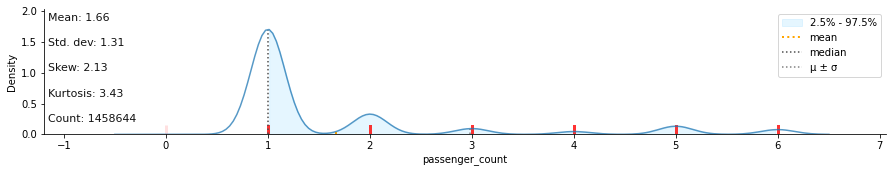

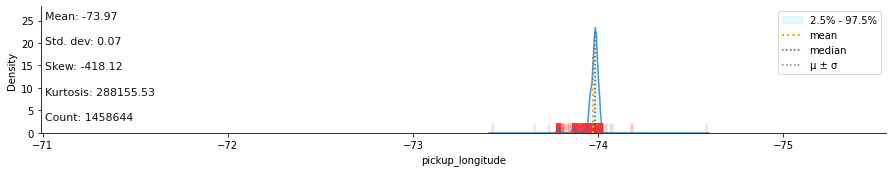

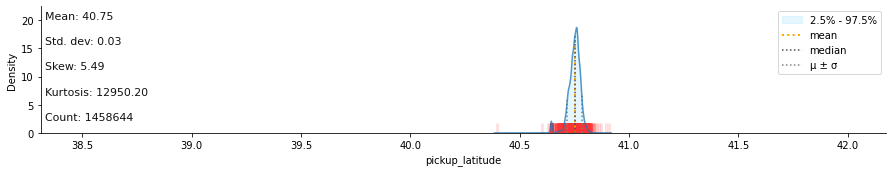

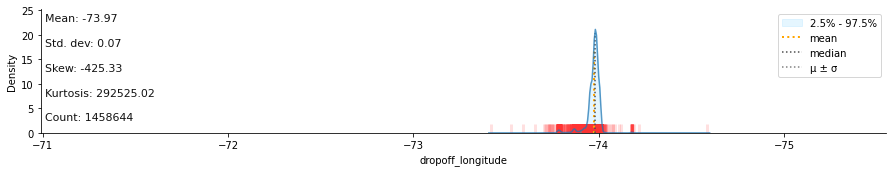

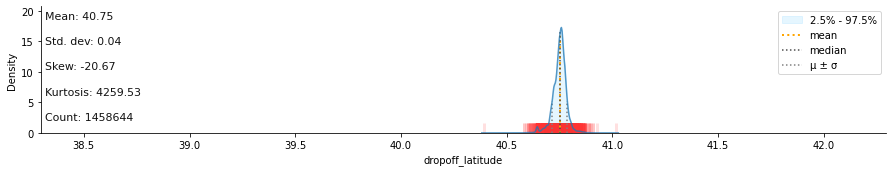

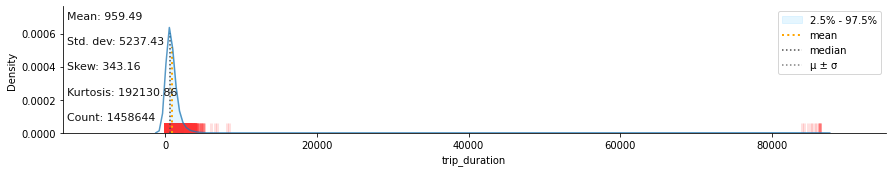

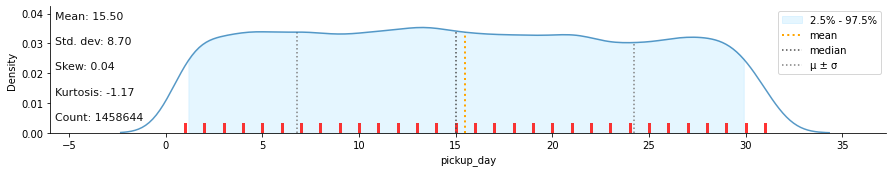

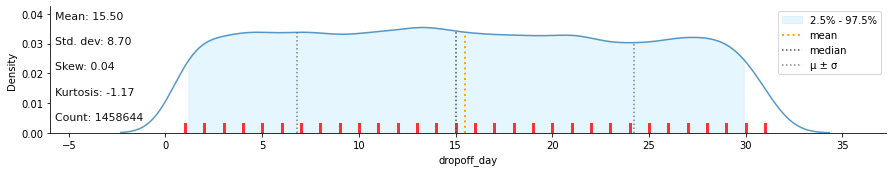

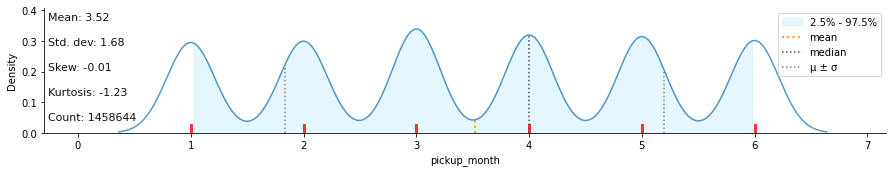

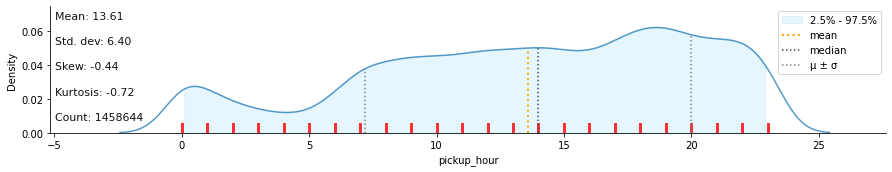

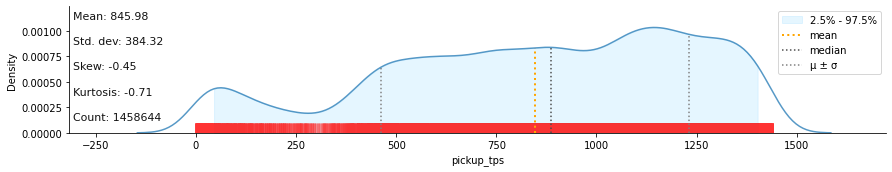

In [23]:
# returns a distribution plot for every numeric feature
klib.dist_plot(ndf)

It is observed that:

In passenger count 7 and more passengers are being treated as outliers.
pickup_longitude, pickup_latitude, dropoff_longitude and dropoff_latitude has outliers.
Our target variable trip_duration has lot of outliers

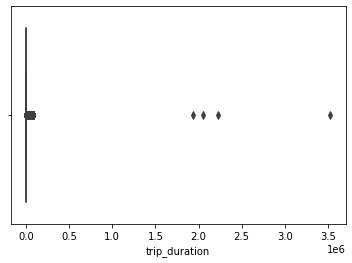

In [24]:
# Plotting boxplot of trip duration
sns.boxplot(ndf.trip_duration)

In [25]:
# Looking at trip duration less than 30s
ndf[ndf.trip_duration<15]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,pickup_day_name,pickup_hour,pickup_tps
842,2,2016-05-21 12:46:46,2016-05-21 12:46:49,2,-73.782372,40.648766,-73.782372,40.648746,N,3,21,21,5,Saturday,12,766
1107,2,2016-06-23 13:36:48,2016-06-23 13:36:50,3,-73.827660,40.716175,-73.822113,40.711452,N,2,23,23,6,Thursday,13,816
1492,1,2016-01-13 20:11:46,2016-01-13 20:11:53,1,-73.793442,40.644814,-73.795242,40.644669,N,7,13,13,1,Wednesday,20,1211
1960,1,2016-03-30 08:05:38,2016-03-30 08:05:41,1,-73.964096,40.777172,-73.964088,40.777157,N,3,30,30,3,Wednesday,8,485
2441,2,2016-05-23 14:20:49,2016-05-23 14:20:57,1,-73.781830,40.644699,-73.781830,40.644699,N,8,23,23,5,Monday,14,860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456442,2,2016-02-11 08:01:28,2016-02-11 08:01:35,1,-73.978844,40.761787,-73.978951,40.761833,N,7,11,11,2,Thursday,8,481
1456613,1,2016-06-06 18:37:15,2016-06-06 18:37:24,1,-73.789665,40.646984,-73.789658,40.646976,N,9,6,6,6,Monday,18,1117
1457121,1,2016-04-03 07:24:06,2016-04-03 07:24:13,1,-73.913620,40.765675,-73.913620,40.765667,N,7,3,3,4,Sunday,7,444
1457746,2,2016-01-29 21:58:11,2016-01-29 21:58:23,1,-73.975708,40.733089,-73.975685,40.733101,N,12,29,29,1,Friday,21,1318


In [26]:
# Removing trip duration less than 30s
ndf=ndf[ndf.trip_duration>15]

In [27]:
# Looking at standard deviation of trip duration 
ndf.trip_duration.std()

5242.591815875557

In [28]:
def std_dev_otlier_removal_2std(df,column_string):
  m=df[column_string].mean()
  sd=df[column_string].std()
  df=df[(df[column_string]<(m + 2*sd))&(df[column_string]>(m - 2*sd))]
  return df

In [29]:
ndf=std_dev_otlier_removal_2std(ndf,'trip_duration')

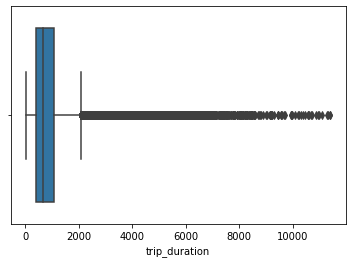

In [30]:
# Plotting boxplot of trip duration
sns.boxplot(ndf.trip_duration)

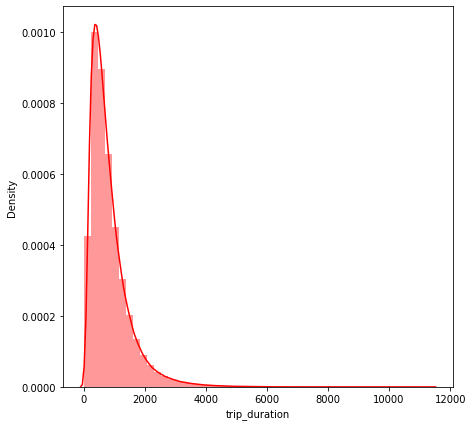

In [31]:
plt.figure(figsize=(7,7))
sns.distplot(ndf['trip_duration'],color="R")

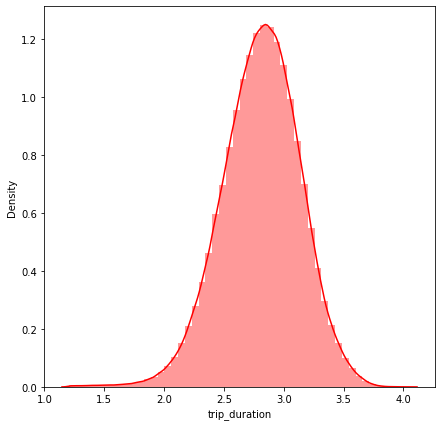

In [32]:
# Plotting the distribution of trip duration
plt.figure(figsize=(7,7))
sns.distplot(np.log10(ndf['trip_duration']),color="R")

**Passengers**

New York City Taxi Passenger Limit says:

A maximum of 4 passengers can ride in traditional cabs, there are also 5 passenger cabs that look more like minivans. A child under 7 is allowed to sit on a passenger's lap in the rear seat in addition to the passenger limit. So, in total we can assume that maximum 6 passenger can board the new york taxi i.e. 5 adult + 1 minor

In [33]:
# Number of trips for each passenger count
ndf.passenger_count.value_counts()

1    1029772
2     209749
5      77794
3      59723
6      48169
4      28331
0         30
7          2
9          1
8          1
Name: passenger_count, dtype: int64

It is found that there are 60 observation with 0 passenger and 5 trips carrying more than 6 passengers. As both the cases are not possible, thus it will be better to remove them.

In [34]:
# Keeping passenger counts greater than zero
ndf=ndf[ndf.passenger_count>0]

In [35]:
# Keeping passenger counts less than 7
ndf=ndf[ndf.passenger_count<7]

In [36]:
# Checking the counts again after removing unwanted observations
ndf.passenger_count.value_counts()

1    1029772
2     209749
5      77794
3      59723
6      48169
4      28331
Name: passenger_count, dtype: int64

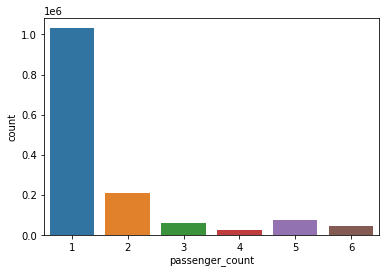

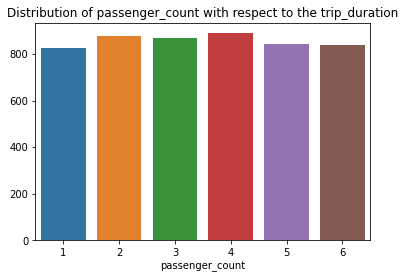

In [37]:
# Plotting passenger counts
sns.countplot(ndf.passenger_count)
plt.show()
df = ndf.groupby('passenger_count')['trip_duration'].mean()
plt.title('Distribution of passenger_count with respect to the trip_duration')
sns.barplot(df.index,df.values)
plt.show()

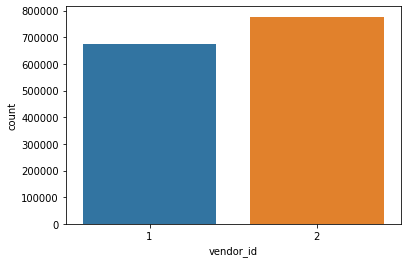

vendor_id
1    832.994029
2    843.401141
Name: trip_duration, dtype: float64


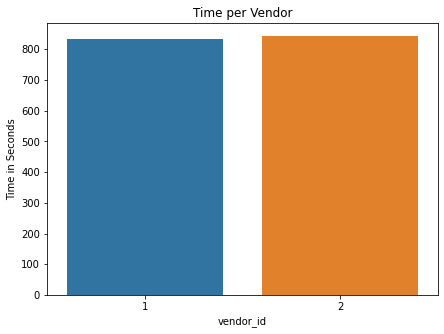

In [38]:
# Plot counts for each vendor id
sns.countplot(x='vendor_id',data=ndf)
plt.show()
df = ndf.groupby('vendor_id')['trip_duration'].mean()
print(df)
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per Vendor')
plt.ylabel('Time in Seconds')
plt.show()

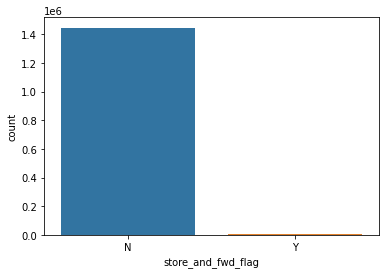

store_and_fwd_flag
N     837.172861
Y    1089.499624
Name: trip_duration, dtype: float64


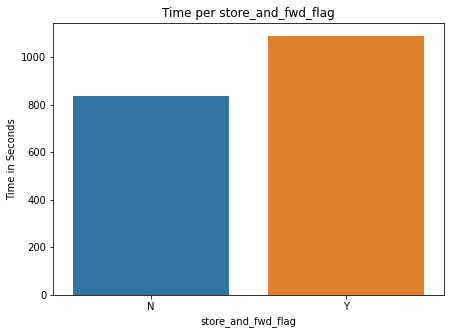

In [39]:
# Plotting store_and_fwd_flag distribution
sns.countplot(ndf.store_and_fwd_flag)
plt.show()
df = ndf.groupby('store_and_fwd_flag')['trip_duration'].mean()
print(df)
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per store_and_fwd_flag')
plt.ylabel('Time in Seconds')
plt.show()

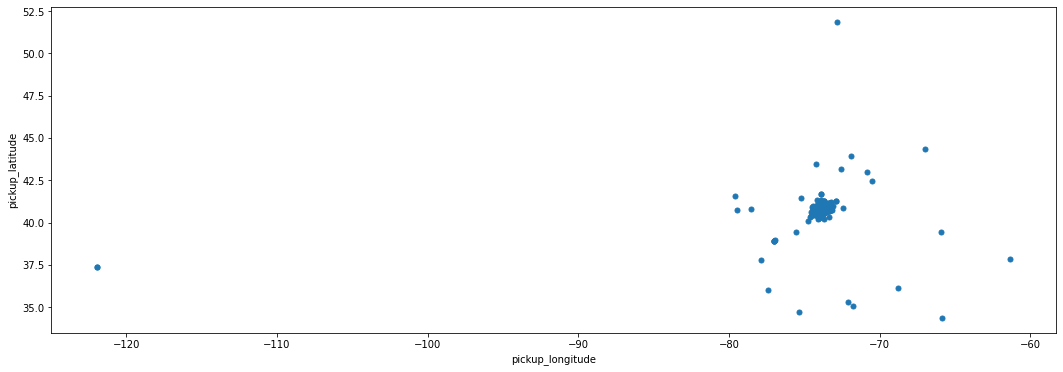

In [40]:
#Plot pickup positions to visualize outliers
pickup_longitude = list(ndf.pickup_longitude)
pickup_latitude = list(ndf.pickup_latitude)
plt.subplots(figsize=(18,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

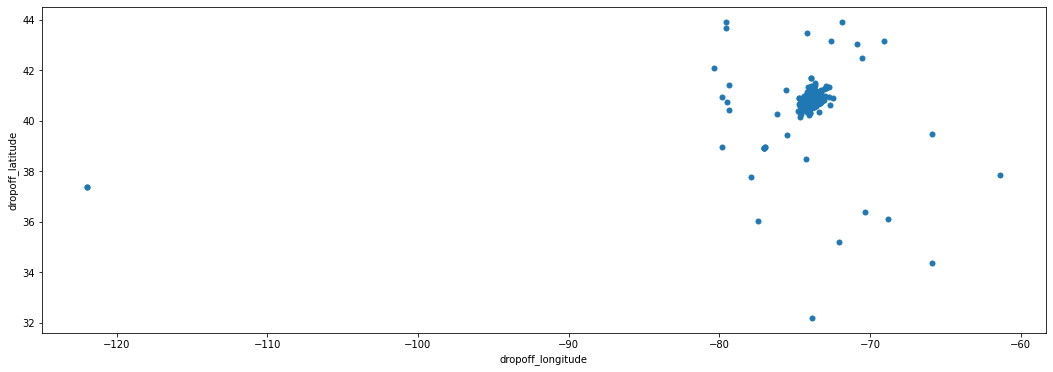

In [41]:
dropoff_longitude = list(ndf.dropoff_longitude)
dropoff_latitude = list(ndf.dropoff_latitude)
plt.subplots(figsize=(18,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

In [42]:
ndf[ndf.pickup_longitude<-120]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,pickup_day_name,pickup_hour,pickup_tps
1068810,2,2016-01-27 18:26:40,2016-01-27 18:45:05,2,-121.933235,37.389297,-121.933205,37.389103,N,1105,27,27,1,Wednesday,18,1106
1184454,2,2016-02-26 13:50:19,2016-02-26 13:58:38,2,-121.933342,37.389381,-121.933304,37.389511,N,499,26,26,2,Friday,13,830


In [43]:
#Remove position outliers
ndf = ndf[(ndf.pickup_longitude > -120)]
ndf = ndf[(ndf.pickup_latitude < 50)]
ndf = ndf[(ndf.dropoff_longitude < -70) & (ndf.dropoff_longitude > -80)]
ndf = ndf[(ndf.dropoff_latitude < 50)]

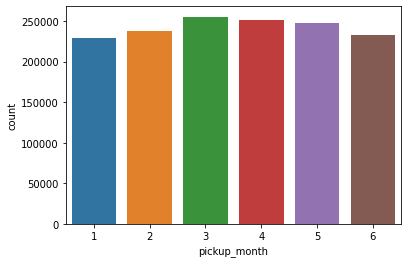

pickup_month
1    792.102999
2    791.274052
3    819.105241
4    849.417195
5    885.242843
6    892.318579
Name: trip_duration, dtype: float64


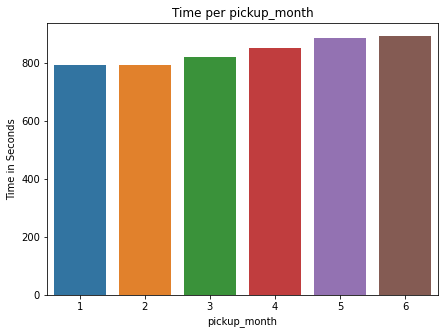

In [44]:
# Plotting the no. of trips in each month
sns.countplot(ndf.pickup_month)
plt.show()
df = ndf.groupby('pickup_month')['trip_duration'].mean()
print(df)
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per pickup_month')
plt.ylabel('Time in Seconds')
plt.show()

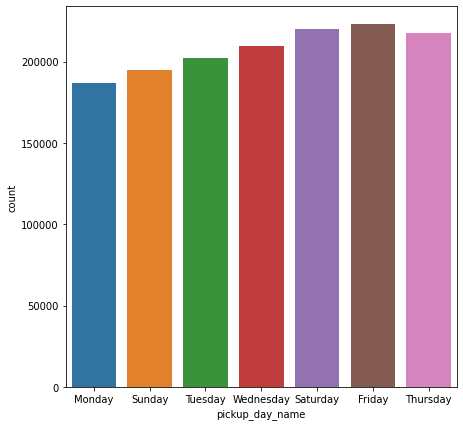

pickup_day_name
Thursday     898.865384
Wednesday    880.898660
Friday       868.492687
Tuesday      856.708633
Monday       811.702384
Saturday     779.859733
Sunday       764.503524
Name: trip_duration, dtype: float64


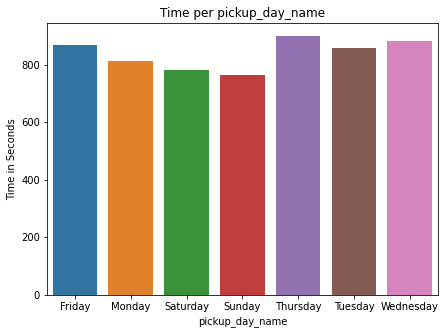

In [45]:
# Plotting the observation each day of week
plt.figure(figsize=(7,7))
sns.countplot(ndf.pickup_day_name)
plt.show()
df = ndf.groupby('pickup_day_name')['trip_duration'].mean()
print(df.sort_values(ascending=False))
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per pickup_day_name')
plt.ylabel('Time in Seconds')
plt.show()

In [46]:
# Creating function for ordering each day of week. The weigths are assigned according to the traffic. Days with more trips are assigned higher weights.
def day(ch):
    if ch=='Monday':
        return 3
    elif ch=='Tuesday':
        return 4
    elif ch=='Wednesday':
        return 6
    elif ch=='Thursday':
        return 7
    elif ch=='Friday':
        return 5
    elif ch=='Saturday':
        return 2
    else:
        return 1

In [47]:
# Creating feature to order each day of week
ndf['pickup_dayn']=ndf['pickup_day_name'].apply(day)

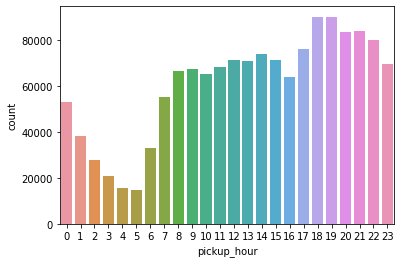

pickup_hour
16    967.986991
15    967.575392
14    949.885925
17    933.519719
13    898.923337
12    879.192365
11    877.211987
18    861.733716
10    849.276727
9     845.038789
8     835.920002
23    813.673117
22    806.213155
19    790.801288
0     782.161583
21    778.446171
20    770.180693
7     760.256192
1     741.633204
4     737.355717
5     716.533145
3     704.460631
2     702.877173
6     673.484219
Name: trip_duration, dtype: float64


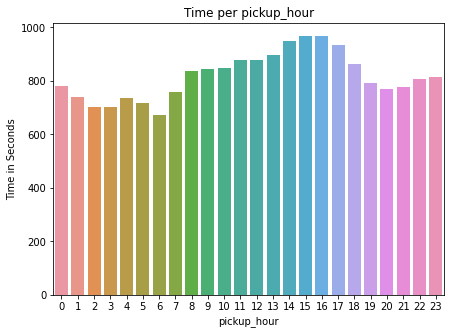

In [48]:
# Looking at traffic at each hour of day
sns.countplot(ndf.pickup_hour)
plt.show()
df = ndf.groupby('pickup_hour')['trip_duration'].mean()
print(df.sort_values(ascending=False))
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per pickup_hour')
plt.ylabel('Time in Seconds')
plt.show()

In [49]:
# Creating function to groupify each hour into 4 parts
def time_of_day(x):
    if x in range(0,7):
        return 1
    elif x in range(7,19):
        return 3
    else:
        return 2

In [50]:
# Creating feature of four time sessions according to traffic
ndf['pickup_timeofday']=ndf['pickup_hour'].apply(time_of_day)

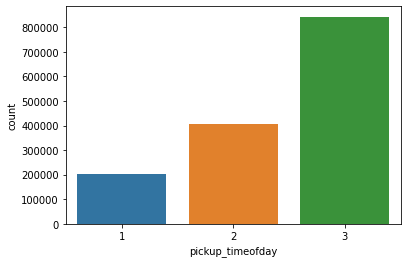

In [51]:
# Plotting the four sections
sns.countplot(ndf.pickup_timeofday)

#Feature Engineering

In [52]:
# Creating function to calculate distance
from math import sin, cos, sqrt, atan2, radians

def get_distance(lon_1, lon_2, lat_1, lat_2):

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat_1)
    lon1 = radians(lon_1)
    lat2 = radians(lat_2)
    lon2 = radians(lon_2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance

In [53]:
# Creating feature as dstance in kms
ndf["distance"] = ndf.apply(lambda x: get_distance(x["pickup_longitude"],x["dropoff_longitude"],x["pickup_latitude"],x["dropoff_latitude"]),axis=1)

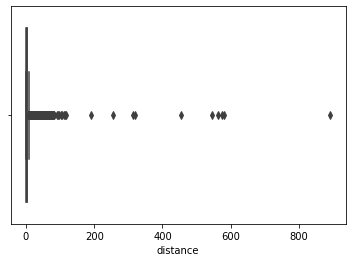

In [54]:
sns.boxplot(ndf.distance)

In [55]:
# Looking for trips covered less than 50m
ndf[ndf.distance<0.05]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,pickup_day_name,pickup_hour,pickup_tps,pickup_dayn,pickup_timeofday,distance
246,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,227,29,29,2,Monday,18,1119,3,3,0.000000
291,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,1109,10,10,5,Tuesday,18,1087,4,3,0.000000
323,1,2016-06-27 11:22:37,2016-06-27 11:23:17,1,-74.001030,40.756653,-74.000999,40.756626,N,40,27,27,6,Monday,11,682,3,3,0.003929
337,1,2016-05-20 14:04:03,2016-05-20 14:33:41,1,-73.986305,40.777023,-73.985855,40.776791,N,1778,20,20,5,Friday,14,844,5,3,0.045907
407,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,947,16,16,5,Monday,23,1395,3,2,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457462,1,2016-01-19 18:09:44,2016-01-19 18:10:09,3,-73.951660,40.809105,-73.951668,40.809101,N,25,19,19,1,Tuesday,18,1089,4,3,0.000770
1457540,1,2016-04-27 19:56:25,2016-04-27 19:56:49,2,-74.006447,40.782356,-74.006332,40.782333,N,24,27,27,4,Wednesday,19,1196,6,2,0.009969
1458291,2,2016-05-04 01:41:34,2016-05-04 01:46:52,1,-73.936874,40.764610,-73.936768,40.764694,N,318,4,4,5,Wednesday,1,101,6,1,0.012966
1458544,1,2016-06-16 15:10:11,2016-06-16 15:10:49,1,-73.956459,40.767231,-73.956589,40.767269,N,38,16,16,6,Thursday,15,910,7,3,0.011721


In [56]:
# Removing trips with distance less than 50m
ndf=ndf[ndf.distance>0.05]

In [57]:
# Looking for trips covered greater than 550m
ndf[ndf.distance>180]

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,pickup_day_name,pickup_hour,pickup_tps,pickup_dayn,pickup_timeofday,distance
275644,1,2016-02-24 16:20:59,2016-02-24 16:35:34,4,-75.354332,34.712234,-73.834923,32.181141,N,875,24,24,2,Wednesday,16,980,6,3,314.863015
377068,1,2016-04-02 20:33:19,2016-04-02 20:38:01,1,-74.007095,40.717113,-76.963242,38.946033,N,282,2,2,4,Saturday,20,1233,2,2,320.226270
397526,1,2016-04-28 13:32:14,2016-04-28 14:14:09,2,-73.870682,40.773598,-79.817978,38.963852,N,2515,28,28,4,Thursday,13,812,7,3,546.024855
644165,2,2016-06-02 15:19:35,2016-06-02 15:32:59,1,-73.980751,40.757111,-74.240051,38.478298,N,804,2,2,6,Thursday,15,919,7,3,254.443373
910072,1,2016-02-15 18:57:32,2016-02-15 19:02:35,2,-73.989914,40.756634,-70.346077,36.398121,N,303,15,15,2,Monday,18,1137,3,3,579.024529
923793,1,2016-02-24 21:02:32,2016-02-24 21:25:57,1,-73.972366,40.758633,-79.553535,43.674000,N,1405,24,24,2,Wednesday,21,1262,6,2,562.411686
974378,2,2016-01-06 20:40:52,2016-01-06 20:51:03,5,-71.799896,35.081532,-79.352837,40.436329,N,611,6,6,1,Wednesday,20,1240,6,2,891.493875
1013474,1,2016-05-05 18:02:50,2016-05-05 18:18:23,1,-73.978912,40.756763,-79.338699,41.427902,N,933,5,5,5,Thursday,18,1082,7,3,455.384115
1100676,1,2016-05-03 16:24:07,2016-05-03 17:18:34,2,-73.991325,40.750023,-79.518616,43.921028,N,3267,3,3,5,Tuesday,16,984,4,3,575.055909
1301396,1,2016-03-26 22:01:54,2016-03-27 00:47:16,1,-73.981491,40.773251,-76.135719,40.243626,N,9922,26,27,3,Saturday,22,1321,2,2,191.462878


In [58]:
# Removing trips with distance greater than 550m
ndf=ndf[ndf.distance<180]


We see there are 5847 trips with 0 km distance.

The reasons for 0 km distance can be:

The dropoff location couldn’t be tracked. The driver deliberately took this ride to complete a target ride number. The passengers canceled the trip. We will analyze these trips further in bivariate analysis.

In [59]:
ndf.to_csv('filtered_df.csv',index=False)

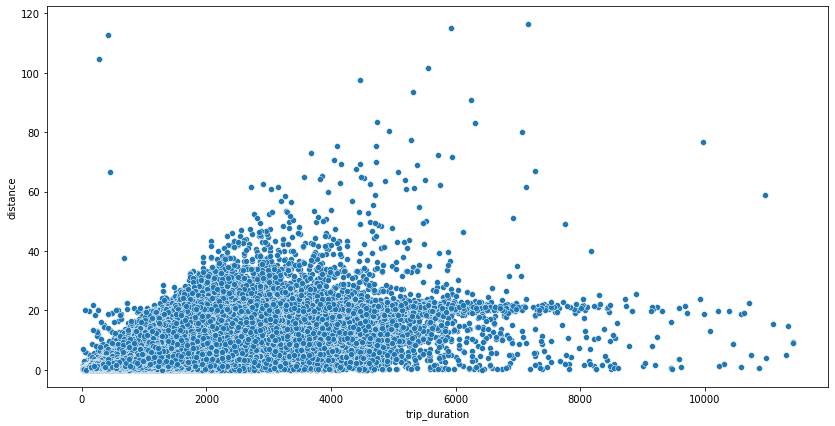

In [60]:
plt.figure(figsize=(14,7))
sns.scatterplot(ndf.trip_duration,ndf.distance)

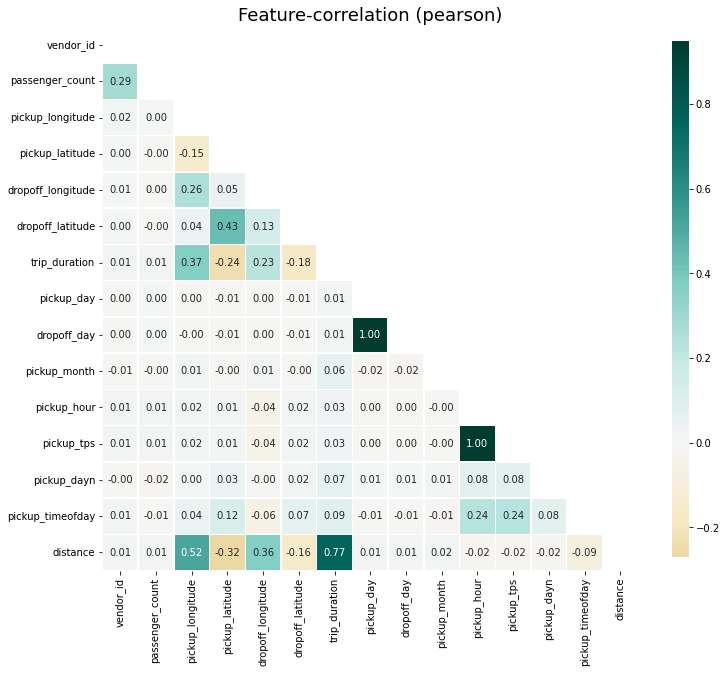

In [61]:
klib.corr_plot(ndf)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


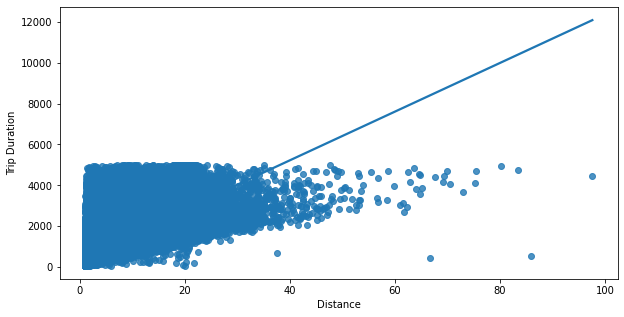

In [ ]:
plt.figure(figsize = (10,5))
sns.regplot(df.distance, df.trip_duration)
plt.ylabel('Trip Duration')
plt.xlabel('Distance')
plt.show()

In [62]:
ndf.corr(method='spearman')['trip_duration']

vendor_id            0.004530
passenger_count      0.024090
pickup_longitude     0.029011
pickup_latitude     -0.110408
dropoff_longitude    0.070416
dropoff_latitude    -0.125946
trip_duration        1.000000
pickup_day           0.011370
dropoff_day          0.011309
pickup_month         0.050612
pickup_hour          0.030469
pickup_tps           0.029993
pickup_dayn          0.069401
pickup_timeofday     0.071850
distance             0.798525
Name: trip_duration, dtype: float64

In [63]:
ndf.drop('trip_duration',axis=1).corr(method='spearman')[ndf.drop('trip_duration',axis=1).corr(method='spearman')>0.5]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day,dropoff_day,pickup_month,pickup_hour,pickup_tps,pickup_dayn,pickup_timeofday,distance
vendor_id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
passenger_count,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,NaN,NaN,1.000000,0.597857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_latitude,NaN,NaN,0.597857,1.000000,NaN,0.502051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_longitude,NaN,NaN,NaN,NaN,1.000000,0.545492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_latitude,NaN,NaN,NaN,0.502051,0.545492,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_day,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998219,NaN,NaN,NaN,NaN,NaN,NaN
dropoff_day,NaN,NaN,NaN,NaN,NaN,NaN,0.998219,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
pickup_month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
pickup_hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.998801,NaN,NaN,NaN


In [64]:
def select_within_boundingbox(df, BB):
    return ((ndf["pickup_longitude"] >= BB[0]) & (ndf["pickup_longitude"] <= BB[1]) & 
            (ndf["pickup_latitude"] >= BB[2]) & (ndf["pickup_latitude"] <= BB[3]) &
            (ndf["dropoff_longitude"] >= BB[0]) & (ndf["dropoff_longitude"] <= BB[1]) &
            (ndf["dropoff_latitude"] >= BB[2]) & (ndf["dropoff_latitude"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

In [65]:
import folium
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12,)
nyc

In [66]:
for i in ndf.index[:100]:
  folium.CircleMarker(location=[ndf['pickup_latitude'][i],ndf['pickup_longitude'][i]],color='green').add_to(nyc)
nyc

In [67]:
for i in ndf.index[:100]:
  folium.CircleMarker(location=[ndf['dropoff_latitude'][i],ndf['dropoff_longitude'][i]],color='red').add_to(nyc)
nyc

#Building Models

In [68]:
ndf.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_month', 'pickup_day_name', 'pickup_hour',
       'pickup_tps', 'pickup_dayn', 'pickup_timeofday', 'distance'],
      dtype='object')

In [69]:
fc=['passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude','dropoff_latitude', 'store_and_fwd_flag', 'pickup_month', 'pickup_tps', 'pickup_dayn', 'pickup_timeofday', 'distance']

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

x_train,x_test,y_train,y_test=train_test_split(fcd, label, test_size=0.3,random_state=40)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

(1011374, 11) (1011374,)
(433447, 11) (433447,)


In [72]:
# Evaluation metrics 
def print_metrics(actual,prediction,model=''):

  print(f"{model} R2    :", r2_score(actual,prediction))
  print(f"{model} MAE   :", mean_absolute_error(actual,prediction))
  print(f"{model} MSE   :", mean_squared_error(actual,prediction))
  print(f"{model} RMSE  :", np.sqrt(mean_squared_error(actual,prediction)))

In [73]:
#baseline model
test=pd.DataFrame()
test['y_test']=pd.DataFrame(y_test.values)
test['ymean']=test.y_test.mean()

print_metrics((test['y_test']),(test['ymean']),'Base')

Base R2    : 0.0
Base MAE   : 466.93102010286464
Base MSE   : 434044.87733194575
Base RMSE  : 658.8208233897482


In [74]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
y_train_pred_lr = cross_val_predict(lr,x_train,y_train,cv=5)
y_pred_lr=lr.predict(x_test)
print_metrics((y_train),(y_train_pred_lr),'LR_train')
print_metrics((y_test),(y_pred_lr),'LR_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lr)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

LR_train R2    : 0.6310497843965817
LR_train MAE   : 269.2901930988347
LR_train MSE   : 159653.81316661858
LR_train RMSE  : 399.56703213180464
LR_test R2    : 0.6314754490842818
LR_test MAE   : 268.99652313046084
LR_test MSE   : 159956.19349602333
LR_test RMSE  : 399.94523812145
Adjusted R2 :  0.6314660964245749


In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error',random_state=100,n_estimators=6,max_depth=8).fit(x_train,y_train)
y_train_pred_rf = cross_val_predict(rf,x_train,y_train,cv=5)
y_pred_rf=rf.predict(x_test)
print_metrics((y_train),(y_train_pred_rf),'RF_train')
print_metrics((y_test),(y_pred_rf),'RF_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

RF_train R2    : 0.7289238836824149
RF_train MAE   : 223.6980109408232
RF_train MSE   : 117301.28835327704
RF_train RMSE  : 342.49275664351944
RF_test R2    : 0.7286985818429613
RF_test MAE   : 223.35480714825525
RF_test MSE   : 117756.99076395479
RF_test RMSE  : 343.15738483085977
Adjusted R2 :  0.7286916965761976


In [76]:
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=250, num_leaves=200, max_depth=20, learning_rate=0.15,objective='regression')
lgbm.fit(x_train, y_train)

y_train_pred_lg=lgbm.predict(x_train)
y_pred_lg=lgbm.predict(x_test)
print_metrics(y_train,y_train_pred_lg,'LG_train')
print_metrics(y_test,y_pred_lg,'LG_test')
print("Adjusted R2 : ", 1-(1-r2_score((y_test), (y_pred_lg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

LG_train R2    : 0.8463988373872462
LG_train MAE   : 164.73051424472624
LG_train MSE   : 66466.99278341552
LG_train RMSE  : 257.8119329732732
LG_test R2    : 0.8115737623406658
LG_test MAE   : 175.78695806126245
LG_test MSE   : 81785.44321096576
LG_test RMSE  : 285.981543479585
Adjusted R2 :  0.8115689803350266


# **XGBOOST**

In [77]:
from xgboost import XGBRegressor

xg_reg = XGBRegressor(learning_rate = 0.02, max_depth = 5, n_estimators = 200)
xg_reg.fit(x_train,y_train)


y_train_pred_xg = cross_val_predict(xg_reg,x_train,y_train,cv=5)
y_pred_xg=xg_reg.predict(x_test)
print_metrics((y_train),(y_train_pred_xg),'XG_train')
print_metrics((y_test),(y_pred_xg),'XG_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_xg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

[19:14:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:20:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:25:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:29:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:33:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:38:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XG_train R2    : 0.7392327373327011
XG_train MAE   : 215.52635856568537
XG_train MSE   : 112840.39437615054
XG_train RMSE  : 335.91724334447395
XG_test R2    : 0.7382616679806255
XG_test MAE   : 215.2902949481615
XG_test MSE   : 113606.18

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)


param_grid = {
    'n_estimators' : np.arange(200,500,100),
    'max_depth': [8,12,25],
    'num_leaves':[100,200,300],
    'learning_rate':[0.15, 0.25]
}

LG_tuned=RandomizedSearchCV(lgbm, param_grid, cv=cv, n_iter = 10)

LG_tuned.fit(x_train,y_train)

In [ ]:
y_train_pred_lgt=LG_tuned.predict(x_train)
y_pred_lgt=LG_tuned.predict(x_test)
print_metrics(y_train,y_train_pred_lgt,'LG_train')
print_metrics(y_test,y_pred_lgt,'LG_test')
print("Adjusted R2 : ", 1-(1-r2_score((y_test), (y_pred_lgt)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))